## Handwritten Digit Classification - K-Means
Task:

Write a K-Means unsupervised classification algorithmen for the digit dataset. There are 10 digits for prediction.

Assume the dataset to be clean and ready for usage.

In [1]:
import pandas as pd
import numpy as np
import sklearn
from time import time
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(y, estimator.labels_),
             metrics.completeness_score(y, estimator.labels_),
             metrics.v_measure_score(y, estimator.labels_),
             metrics.adjusted_rand_score(y, estimator.labels_),
             metrics.adjusted_mutual_info_score(y, estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean')))

E:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


first_model	0.22s	69195	0.575	0.647	0.609	0.458	0.571	0.132


E:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


PCA-based	0.04s	70793	0.667	0.695	0.681	0.553	0.663	0.140


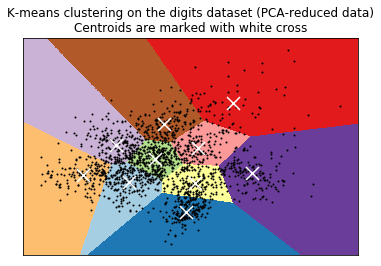

In [3]:
digits = load_digits()

data = scale(digits.data)
y = digits.target
n_digits = len(np.unique(y))
k = 10
samples, features = data.shape


clf = KMeans(n_clusters=k, init='random', n_init=10, max_iter=800, tol=1e-4)
bench_k_means(estimator=clf, name="first_model", data=data)

pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)

# PCA reduction to 2 dimensions to plot this
reduced_data = PCA(n_components=2).fit_transform(data)
clf_kmeans = KMeans(init='random', n_clusters=n_digits, n_init=20, max_iter=800, tol=1e-6)
clf_kmeans.fit(reduced_data)


h = .02
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf_kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
centroids = clf_kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
figname="2d_pca_representation.png"
plt.savefig(figname)